# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

80

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_df = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try: 
        weather_response = requests.get(query_url).json()
        city_df = pd.DataFrame({"City": weather_response["name"],
                                "Cloudiness": weather_response["clouds"],
                                "Country": weather_response["sys"]["country"],
                                "Date": weather_response["dt"],
                                "Humidity": weather_response["main"]["humidity"],
                                "Lat": weather_response["coord"]["lat"], 
                                "Lng": weather_response["coord"]["lon"],
                                "Max Temp": weather_response["main"]["temp_max"], 
                                "Wind Speed": weather_response["wind"]["speed"]})
        weather_df = weather_df.append(city_df)

        print(f"Adding city {city}")
    except KeyError:
        print(f"{city} Not Found")

taolanaro Not Found
grand river south east Not Found
Adding city arraial do cabo
Adding city feicheng
Adding city orlik
Adding city rikitea
Adding city ushuaia
Adding city kruisfontein
Adding city georgetown
Adding city toba
Adding city clonakilty
Adding city constitucion
illoqqortoormiut Not Found
Adding city suoyarvi
xiangdong Not Found
Adding city qaanaaq
Adding city nichinan
Adding city liwale
Adding city inirida
Adding city pokhara
Adding city pevek
Adding city lensk
Adding city laguna
Adding city mackenzie
Adding city lata
Adding city chuy
Adding city lorengau
Adding city oktyabrskoye
Adding city ust-koksa
Adding city castro
Adding city pauini
scottsburgh Not Found
Adding city ribeira grande
Adding city albany
Adding city atambua
Adding city saint george
Adding city bluff
Adding city lagoa
Adding city chokurdakh
Adding city hobart
Adding city aklavik
Adding city souillac
Adding city moron
Adding city busselton
Adding city mataura
Adding city concepcion del uruguay
Adding city naz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df["Max Temp"] = weather_df["Max Temp"] - 273
weather_df.to_csv('weather_df.csv', index = False)
weather_df = pd.read_csv('weather_df.csv')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arraial do Cabo,75,BR,1586637350,88,-22.97,-42.03,22.15,2.10
1,Feicheng,0,CN,1586637764,56,35.26,117.97,6.93,2.96
2,Orlik,100,RU,1586637354,62,52.52,99.83,-3.06,1.67
3,Rikitea,78,PF,1586637346,74,-23.12,-134.97,25.17,0.60
4,Ushuaia,75,AR,1586637164,70,-54.80,-68.30,7.15,12.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Max Temperature vs. Latitude')

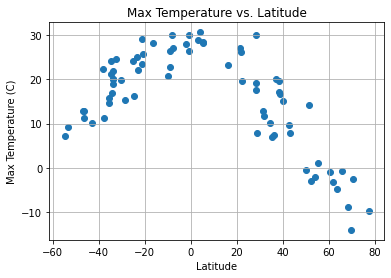

In [5]:
temp_x = weather_df["Lat"]
temp_y = weather_df["Max Temp"]
plt.scatter(temp_x, temp_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs. Latitude')

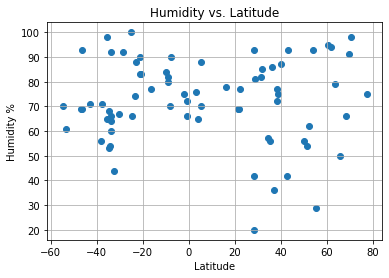

In [6]:
humid_x = weather_df["Lat"]
humid_y = weather_df["Humidity"]
plt.scatter(humid_x, humid_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs. Latitude')

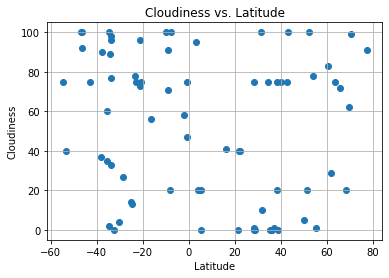

In [7]:
cloud_x = weather_df["Lat"]
cloud_y = weather_df["Cloudiness"]
plt.scatter(cloud_x, cloud_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed vs. Latitude')

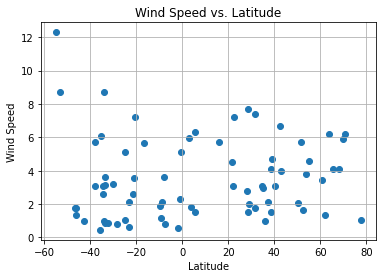

In [8]:
wind_x = weather_df["Lat"]
wind_y = weather_df["Wind Speed"]
plt.scatter(wind_x, wind_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df[weather_df["Lat"] > 0]
south_df = weather_df[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R sqaured = -0.9139423220731008


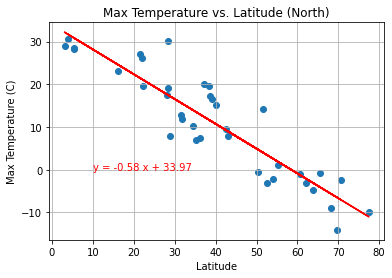

In [11]:
tempnh_x = north_df["Lat"]
tempnh_y = north_df["Max Temp"]
plt.scatter(tempnh_x, tempnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(tempnh_x, tempnh_y)

nh_linreg = slope * tempnh_x + intercept
plt.plot(tempnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(10,0), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R sqaured = 0.8324365037002941


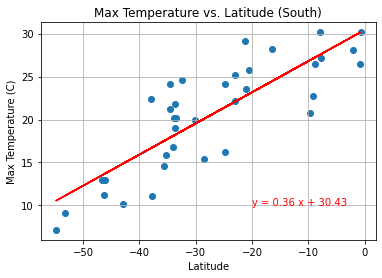

In [12]:
tempsh_x = south_df["Lat"]
tempsh_y = south_df["Max Temp"]
plt.scatter(tempsh_x, tempsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(tempsh_x, tempsh_y)

sh_linreg = slope * tempsh_x + intercept
plt.plot(tempsh_x, sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-20,10), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R sqaured = 0.07734434816116399


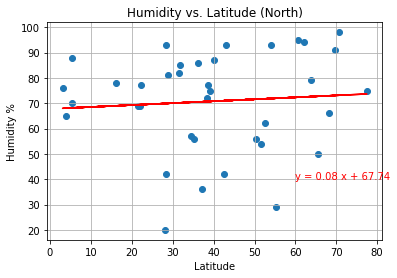

In [13]:
humidnh_x = north_df["Lat"]
humidnh_y = north_df["Humidity"]
plt.scatter(humidnh_x, humidnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude (North)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(humidnh_x.astype(float), humidnh_y.astype(float))

nh_linreg = slope * humidnh_x + intercept
plt.plot(humidnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(60,40), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R sqaured = 0.25742273140008787


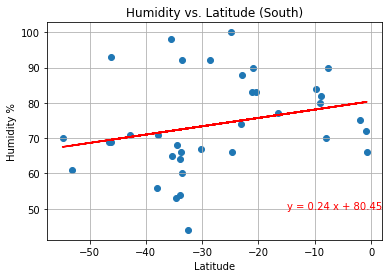

In [14]:
humidsh_x = south_df["Lat"]
humidsh_y = south_df["Humidity"]
plt.scatter(humidsh_x, humidsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity vs. Latitude (South)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(humidsh_x, humidsh_y.astype(float))

sh_linreg = slope * humidsh_x + intercept
plt.plot(humidsh_x, sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-15,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R sqaured = 0.33031906274962197


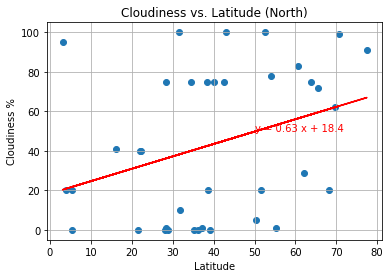

In [15]:
cloudnh_x = north_df["Lat"]
cloudnh_y = north_df["Cloudiness"]
plt.scatter(cloudnh_x, cloudnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Cloudiness vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudnh_x, cloudnh_y.astype(float))

nh_linreg = slope * cloudnh_x + intercept
plt.plot(cloudnh_x, nh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(50,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R sqaured = -0.018664891505779654


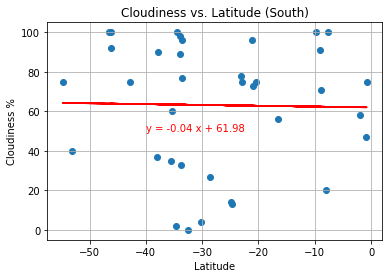

In [16]:
cloudsh_x = south_df["Lat"]
cloudsh_y = south_df["Cloudiness"]
plt.scatter(cloudsh_x, cloudsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Cloudiness vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cloudsh_x, cloudsh_y.astype(float))

cloud_sh_linreg = slope * cloudsh_x + intercept
plt.plot(cloudsh_x, cloud_sh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-40,50), color = "red")
print(f"R sqaured = {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R sqaured = -0.035406455748840444


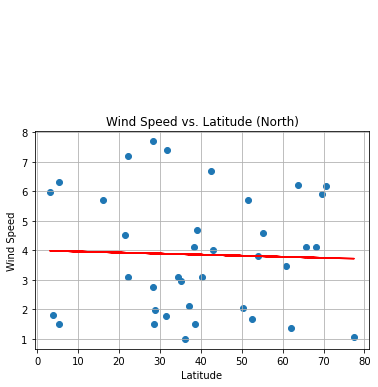

In [17]:
windnh_x = north_df["Lat"]
windnh_y = north_df["Wind Speed"]
plt.scatter(windnh_x, windnh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (North)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(windnh_x, windnh_y)

windnh_linreg = slope * windnh_x + intercept
plt.plot(tempnh_x, windnh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(10,12), color = "red")
print(f"R sqaured = {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R sqaured = -0.2887089362210544


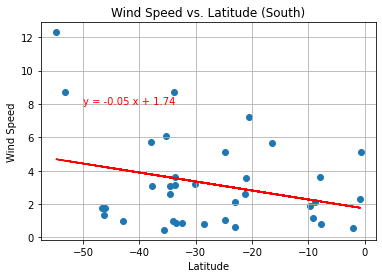

In [18]:
windsh_x = south_df["Lat"]
windsh_y = south_df["Wind Speed"]
plt.scatter(windsh_x, windsh_y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude (South)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(windsh_x, windsh_y)

windsh_linreg = slope * windsh_x + intercept
plt.plot(tempsh_x, windsh_linreg, color="red")
plt.annotate(f"y = {str(round(slope,2))} x + {str(round(intercept,2))}",(-50,8), color = "red")
print(f"R sqaured = {rvalue}")